In [59]:
import numpy as np
import cv2
from IPython.display import Image,display
import matplotlib.pyplot as plt
from PIL import Image

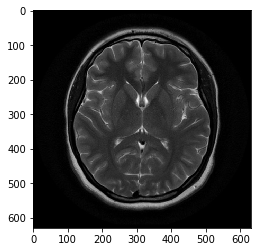

In [81]:
#import the image
image=cv2.imread('C:/Users/user/spyder prog/brain mri/1.jpeg',0)
plt.imshow(gray, cmap="gray")
plt.show()

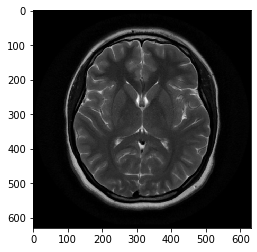

In [83]:
#median filter for smoothing
blured_image=cv2.medianBlur(image,3)
plt.imshow(blured_image,cmap="gray")
plt.show()

In [74]:
#initial mean ti
ti=np.mean(blured_image)
ti

29.63718568909045

In [75]:
#top pixel
flag=0
for i in range(blured_image.shape[0]):
    for j in range(blured_image.shape[1]):
        if blured_image[i][j]>ti:
            top=(i,j)
            flag=1
            break
    if flag==1:
        break
       
#bottom pixel
flag=0
for i in range((blured_image.shape[0]-1),0,-1):
    for j in range(blured_image.shape[1]):
        if blured_image[i][j]>ti:
            bottom=(i,j)
            flag=1
            break
    if flag==1:
        break
    
#left pixel
flag=0
for j in range(blured_image.shape[1]):
    for i in range(blured_image.shape[0]):
        if blured_image[i][j]>ti:
            left=(i,j)
            flag=1
            break
    if flag==1:
        break

#right pixel
flag=0
for j in range((blured_image.shape[1]-1),0,-1):
    for i in range(blured_image.shape[0]):
        if blured_image[i][j]>ti:
            right=(i,j)
            flag=1
            break
    if flag==1:
        break

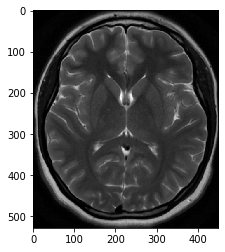

In [84]:
#cropped image
cropped_image=blured_image[top[0]:bottom[0],left[1]:right[1]] 
plt.imshow(cropped_image,cmap="gray")
plt.show()

In [77]:
#final mean value tf
tf=np.mean(cropped_image) 
tf

48.357973669099124

In [78]:
#extracting brain membrane region
br=[]
br=np.asarray(br)
for i in range(cropped_image.shape[0]):
    for j in range(cropped_image.shape[1]):
        if cropped_image[i][j]<tf:
            br=np.append(br,cropped_image[i][j])

In [79]:
#brain membraine mean intensity value T
t=np.mean(br)
t

21.176129086619483

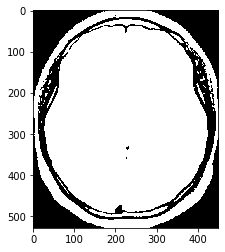

In [85]:
#thresholding using T
thr_image=((cropped_image>t)*255).astype(np.uint8)
plt.imshow(thr_image, cmap="gray")
plt.show()

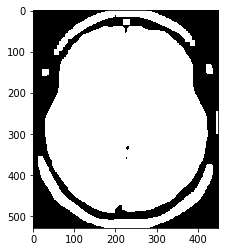

In [86]:
#opening
kernel=np.ones((13,13),np.uint8)*255 
open_image=cv2.morphologyEx(thr_image,cv2.MORPH_OPEN,kernel)
plt.imshow(open_image, cmap="gray")
plt.show()

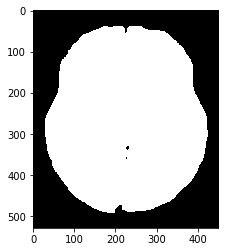

In [88]:
#largest Connected component
new_img = np.zeros_like(open_image)                                     
for val in np.unique(open_image)[1:]:                                     
    mask = np.uint8(open_image == val)                                     
    labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]  
    largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])      
    new_img[labels == largest_label] = val  
    
plt.imshow(new_img, cmap="gray")
plt.show()

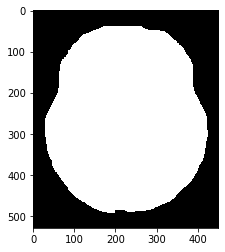

In [89]:
#closing image
kernel1=np.ones((21,21),np.uint8)*255  
close_image=cv2.morphologyEx(new_img,cv2.MORPH_CLOSE,kernel1)
plt.imshow(close_image, cmap="gray")
plt.show()

In [90]:
#mapping the 'image after closing' to the 'cropped image' to get the final resulting image
brain_image=np.zeros_like(cropped_image).astype(np.uint8)
for i in range(cropped_image.shape[0]):
    for j in range(cropped_image.shape[1]):
        if close_image[i][j]==255:
            brain_image[i][j]=cropped_image[i][j]

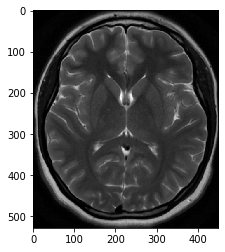

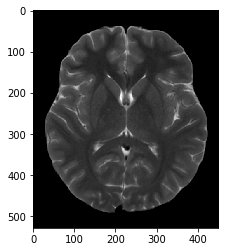

In [93]:
#final result
plt.imshow(cropped_image, cmap="gray")
plt.show()
plt.imshow(brain_image, cmap="gray")
plt.show()